
1. 데이터 가져오기
	- 터미널에서 ~/data/data/bike-sharing-demand 경로에 train.csv 데이터를 train 변수로 가져 옵니다.
	- 여기에서 데이터를 상세히 확인할 수 있습니다.
2. datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
	- to_datetime 활용 : 링크 참조
	- pandas datetime extract year month day 키워드로 검색해 보기
3. year, month, day, hour, minute, second 데이터 개수 시각화하기
	- sns.countplot 활용해서 시각화하기
	- subplot을 활용해서 한 번에 6개의 그래프 함께 시각화하기
4. X, y 컬럼 선택 및 train/test 데이터 분리
	- X(feature) 에는 어떤 데이터 컬럼을 넣어야 될지 고민해 봅시다 데이터 컬럼을 추가하거나 빼면서 잘 조합하여 데이터를 넣기 바랍니다. 만일 모든 데이터 컬럼(특징)을 넣는다면 오차 값이 말도 안 되게 적게 나올 수도 있습니다. ex) count를 예측하는데 casual,registered 컬럼이 필요할까요?
	- count 값을 맞추고자 하므로, y 변수에 count 컬럼의 데이터 넣기
5. LinearRegression 모델 학습
	- sklearn의 LinearRegression 모델 불러오기 및 학습하기
6. 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산
	- 학습된 모델에 X_test를 입력해서 예측값 출력하기
	- 모델이 예측한 값과 정답 target 간의 손실함수 값 계산하기
	- mse 값과 함께 rmse 값도 계산하기
7. x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
	- x축에 X 데이터 중 temp 데이터를, y축에는 count 데이터를 넣어서 시각화하기
	- x축에 X 데이터 중 humidity 데이터를, y축에는 count 데이터를 넣어서 시각화하기


- Data Fields
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_train_original = pd.read_csv("./bike-sharing-demand/train.csv")

In [3]:
# train.csv 데이터를 train 변수로 가져 옵니다.
train = df_train_original.copy()

In [4]:
train.shape

(10886, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [7]:
# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기

train["year"] = pd.to_datetime(train["datetime"]).dt.year
train["month"] = pd.to_datetime(train["datetime"]).dt.month
train["day"] = pd.to_datetime(train["datetime"]).dt.day
train["hour"] = pd.to_datetime(train["datetime"]).dt.hour
train["minute"] = pd.to_datetime(train["datetime"]).dt.minute
train["second"] = pd.to_datetime(train["datetime"]).dt.second

In [8]:
train.drop("datetime", axis=1, inplace=True)
train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0


In [9]:
import seaborn as sns

<Axes: xlabel='second', ylabel='count'>

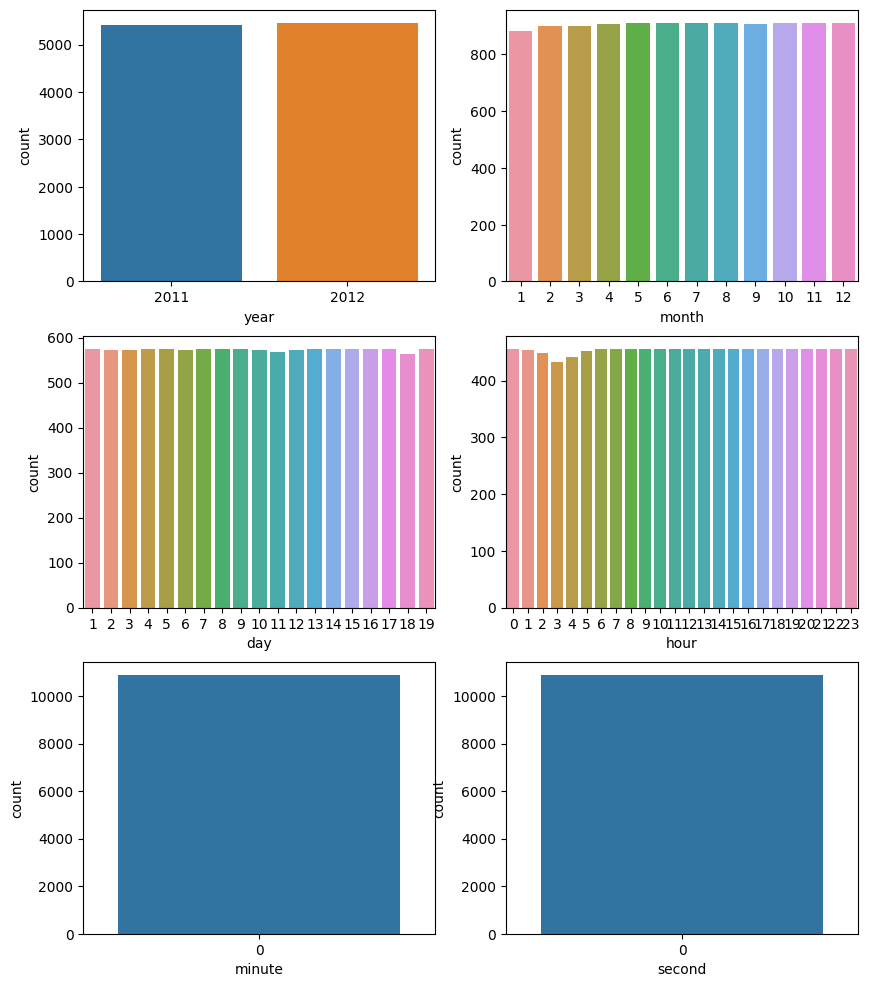

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))
sns.countplot(x="year", data=train, ax=ax[0, 0])
sns.countplot(x="month", data=train, ax=ax[0, 1])
sns.countplot(x="day", data=train, ax=ax[1, 0])
sns.countplot(x="hour", data=train, ax=ax[1, 1])
sns.countplot(x="minute", data=train, ax=ax[2, 0])
sns.countplot(x="second", data=train, ax=ax[2, 1])

In [11]:
drop_label = ["minute", "second"]
train.drop(drop_label, axis=1, inplace=True)
train.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2


In [12]:
train.head(1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0


<Axes: xlabel='count', ylabel='count'>

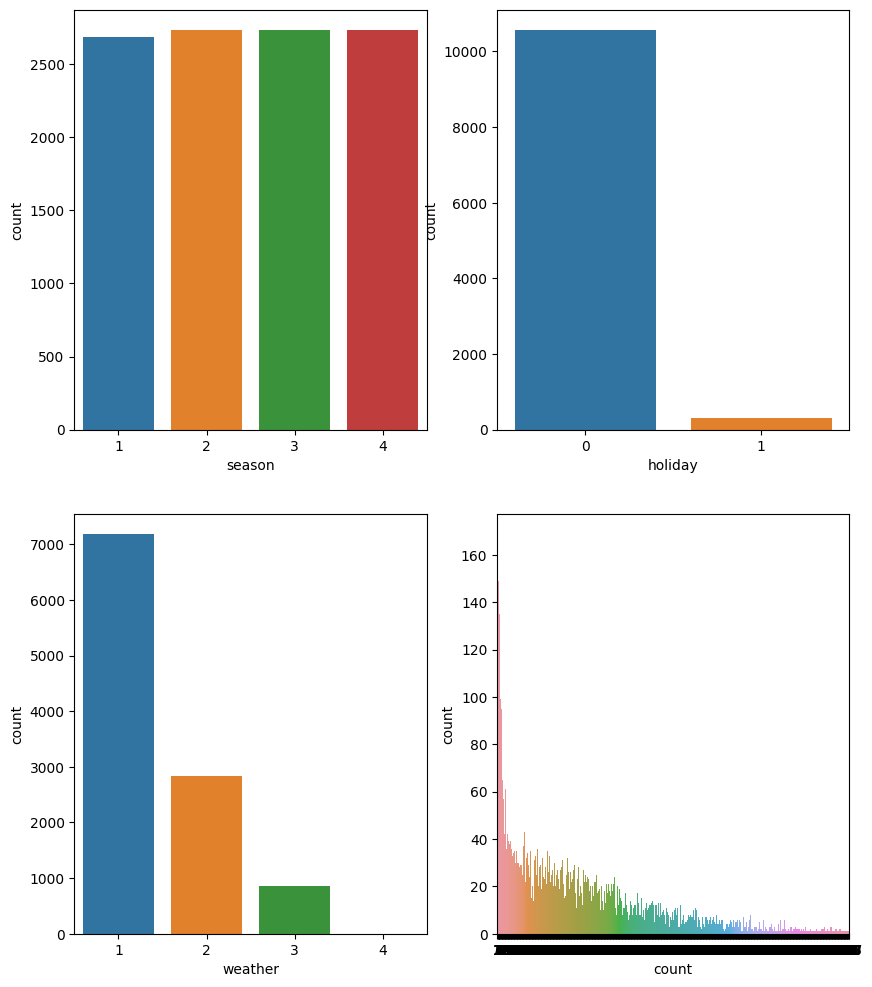

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))
sns.countplot(x="season", data=train, ax=ax[0, 0])
sns.countplot(x="holiday", data=train, ax=ax[0, 1])
sns.countplot(x="weather", data=train, ax=ax[1, 0])
sns.countplot(x="count", data=train, ax=ax[1, 1])

In [14]:
drop_label = ["holiday", "casual", "registered"]
train.drop(drop_label, axis=1, inplace=True)
train.head(3)

,season,workingday,weather,temp,atemp,humidity,windspeed,count,year,month,day,hour
0,1,0,1,9.84,14.395,81,0.0,16,2011,1,1,0
1,1,0,1,9.02,13.635,80,0.0,40,2011,1,1,1
2,1,0,1,9.02,13.635,80,0.0,32,2011,1,1,2


In [15]:
y_train = train["count"]
train.drop("count", axis=1, inplace=True)

In [16]:
train.head(3)

,season,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour
0,1,0,1,9.84,14.395,81,0.0,2011,1,1,0
1,1,0,1,9.02,13.635,80,0.0,2011,1,1,1
2,1,0,1,9.02,13.635,80,0.0,2011,1,1,2


In [17]:
y_train.head()

0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    train, y_train, test_size=0.2, random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on new data
y_pred = model.predict(X_test)

In [21]:
model.score(X_test, y_test)

0.39583351034866965

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 19941.68457572573
Root Mean Squared Error (RMSE): 141.21502956741443
Mean Absolute Error (MAE): 105.32364430041315


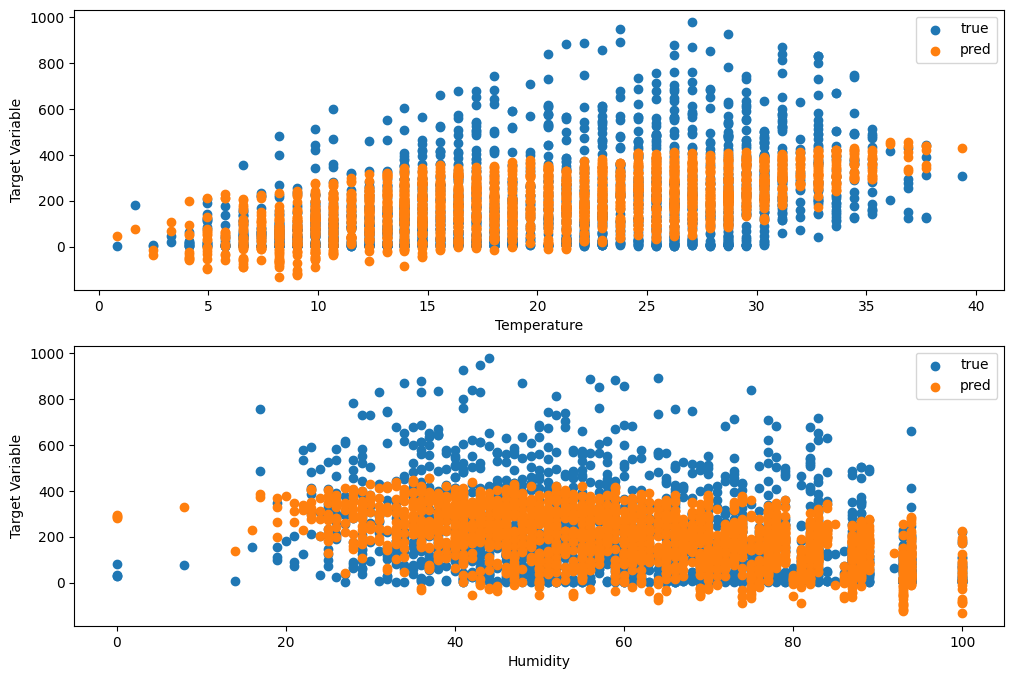

In [23]:
fig, ax = plt.subplots(nrows=2, figsize=(12, 8))
ax[0].scatter(X_test["temp"], y_test, label="true")
ax[0].scatter(X_test["temp"], y_pred, label="pred")
ax[1].scatter(X_test["humidity"], y_test, label="true")
ax[1].scatter(X_test["humidity"], y_pred, label="pred")

ax[0].set_xlabel("Temperature")
ax[0].set_ylabel("Target Variable")
ax[0].legend()

ax[1].set_xlabel("Humidity")
ax[1].set_ylabel("Target Variable")
ax[1].legend()

plt.show()
